In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import neural_network
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import linear_model

In [21]:
# step1: load the data

def loadIrisData():
    from sklearn.datasets import load_iris

    data = load_iris()
    inputs = data['data']
    outputs = data['target']
    outputNames = data['target_names']
    featureNames = list(data['feature_names'])
    feature1 = [feat[featureNames.index('sepal length (cm)')] for feat in inputs]
    feature2 = [feat[featureNames.index('petal length (cm)')] for feat in inputs]
    inputs = [[feat[featureNames.index('sepal length (cm)')], feat[featureNames.index('petal length (cm)')]] for feat in inputs]
    return inputs, outputs, outputNames

inData, outData, featNames = loadIrisData()
print("feature names: ", featNames)
print("some input examples: ", inData[0], inData[50], inData[-5])
print("corresponding labels: ", outData[0], outData[50], outData[-5])

feature names:  ['setosa' 'versicolor' 'virginica']
some input examples:  [np.float64(5.1), np.float64(1.4)] [np.float64(7.0), np.float64(4.7)] [np.float64(6.7), np.float64(5.2)]
corresponding labels:  0 1 2


In [22]:
inputs, outputs, outputNames = loadIrisData()

In [23]:
# step2: split data into train and test

def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    return trainInputs, trainOutputs, testInputs, testOutputs

In [24]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

In [25]:
def data2FeaturesMoreClasses(inputs, outputs):
    labels = set(outputs)
    noData = len(inputs)
    for crtLabel in labels:
        x = [inputs[i][0] for i in range(noData) if outputs[i] == crtLabel ]
        y = [inputs[i][1] for i in range(noData) if outputs[i] == crtLabel ]
        plt.scatter(x, y, label = outputNames[crtLabel])
    plt.xlabel('feat1')
    plt.ylabel('feat2')
    plt.legend()
    plt.show()

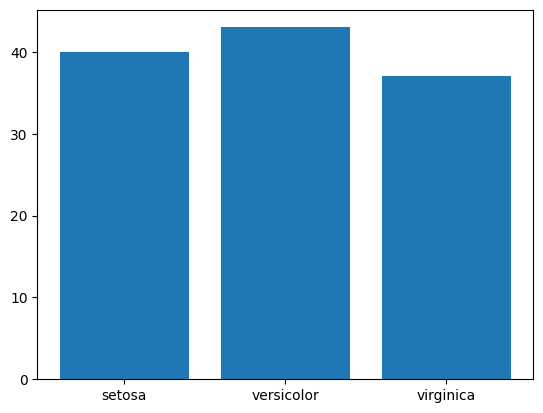

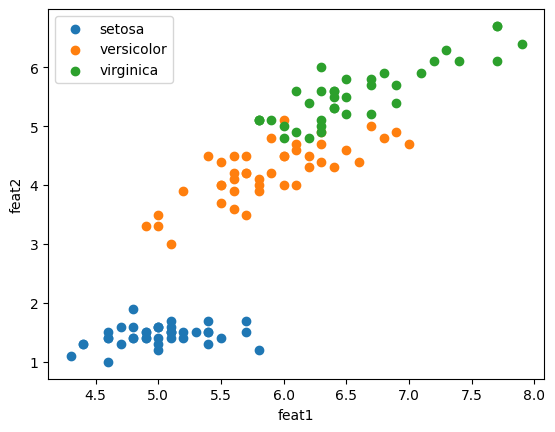

In [26]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)

# plot the training data distribution on classes
bins = range(len(outputNames) + 1)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), outputNames)
plt.show()

# plot the data in order to observe the shape of the classifier required in this problem
data2FeaturesMoreClasses(trainInputs, trainOutputs)

# normalise the data
trainInputs, testInputs = normalisation(trainInputs, testInputs)

In [27]:
 # step3: training the classifier
# liniar classifier and one-vs-all approach for multi-class
# classifier = linear_model.LogisticRegression()

# non-liniar classifier and softmax approach for multi-class
# classifier = neural_network.MLPClassifier()
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

# identify (by training) the classification model
classifier.fit(trainInputs, trainOutputs)

Iteration 1, loss = 0.89050498
Iteration 2, loss = 0.79020695
Iteration 3, loss = 0.70261682
Iteration 4, loss = 0.63795055
Iteration 5, loss = 0.59294737
Iteration 6, loss = 0.55980303
Iteration 7, loss = 0.53299519
Iteration 8, loss = 0.50913765
Iteration 9, loss = 0.48668042
Iteration 10, loss = 0.46438364
Iteration 11, loss = 0.44226943
Iteration 12, loss = 0.42161313
Iteration 13, loss = 0.40252943
Iteration 14, loss = 0.38534053
Iteration 15, loss = 0.37002397
Iteration 16, loss = 0.35631526
Iteration 17, loss = 0.34377371
Iteration 18, loss = 0.33211015
Iteration 19, loss = 0.32117627
Iteration 20, loss = 0.31100910
Iteration 21, loss = 0.30165144
Iteration 22, loss = 0.29309232
Iteration 23, loss = 0.28528781
Iteration 24, loss = 0.27814662
Iteration 25, loss = 0.27156702
Iteration 26, loss = 0.26545860
Iteration 27, loss = 0.25974428
Iteration 28, loss = 0.25437110
Iteration 29, loss = 0.24930393
Iteration 30, loss = 0.24408987
Iteration 31, loss = 0.23811077
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5,), learning_rate_init=0.1, max_iter=1000,
              random_state=1, solver='sgd', verbose=10)

In [17]:
predictedLabels = classifier.predict(testInputs);

In [18]:
def plotConfusionMatrix(cm, classNames, title):
    from sklearn.metrics import confusion_matrix
    import itertools

    classes = classNames
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

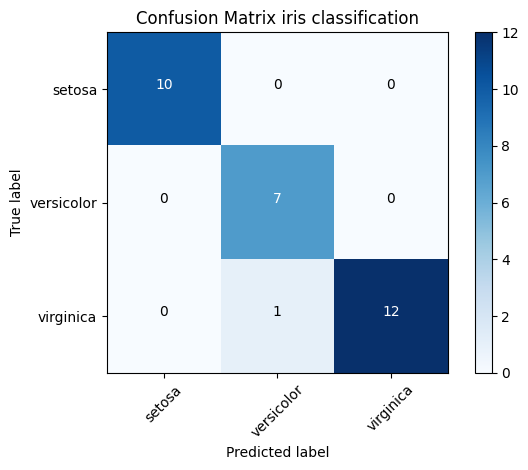

acc:  0.9666666666666667
precision:  {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(0.875), np.str_('virginica'): np.float64(1.0)}
recall:  {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(1.0), np.str_('virginica'): np.float64(0.9230769230769231)}


In [19]:
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)
plotConfusionMatrix(cm, outputNames, "iris classification")

print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)